In [1]:
import cv2 as cv
import numpy as np
from image import to_rgb, crop_image, show_image, show_images
from thresholding import threshold_real
from align import aligned_pairs
from morphology import *
from visualize import *

In [2]:
cfg = dict(
    thresholding=dict(
        blurring="gauss",
        ksize=7),
    align=dict(
        mode="center",
        factor=0.7,
        threshold=0.9,
        method="TM_CCOEFF_NORMED"),
    revise_templ=dict(
        radius=10,
    ),
)

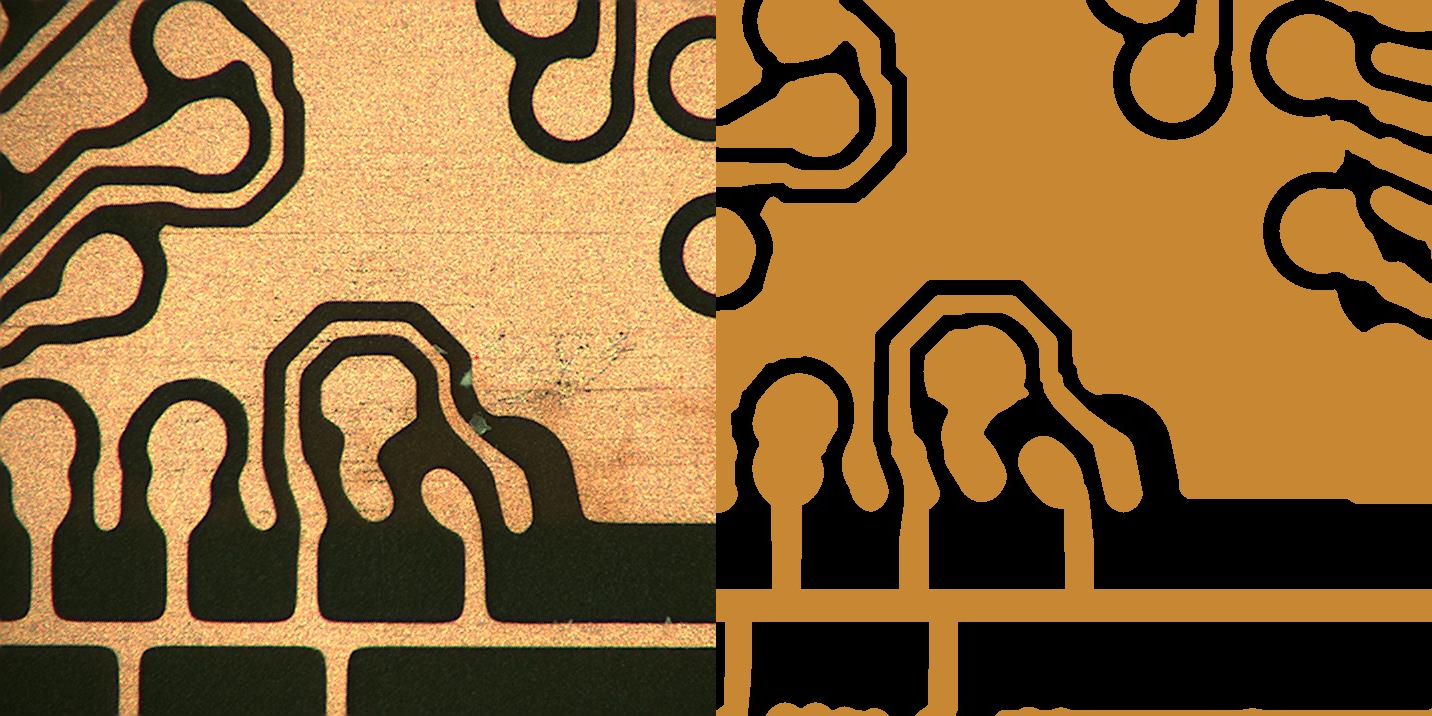

In [3]:
index = 3
vrs = cv.imread(f"data/T0517/vrs/{index}.jpeg", 1)
cam = cv.imread(f"data/T0517/cam/{index}.jpeg", 1)
show_images([vrs, cam], color="BGR")

(111, 22, 716, 694) (0, 0, 716, 694) 0.8611739873886108


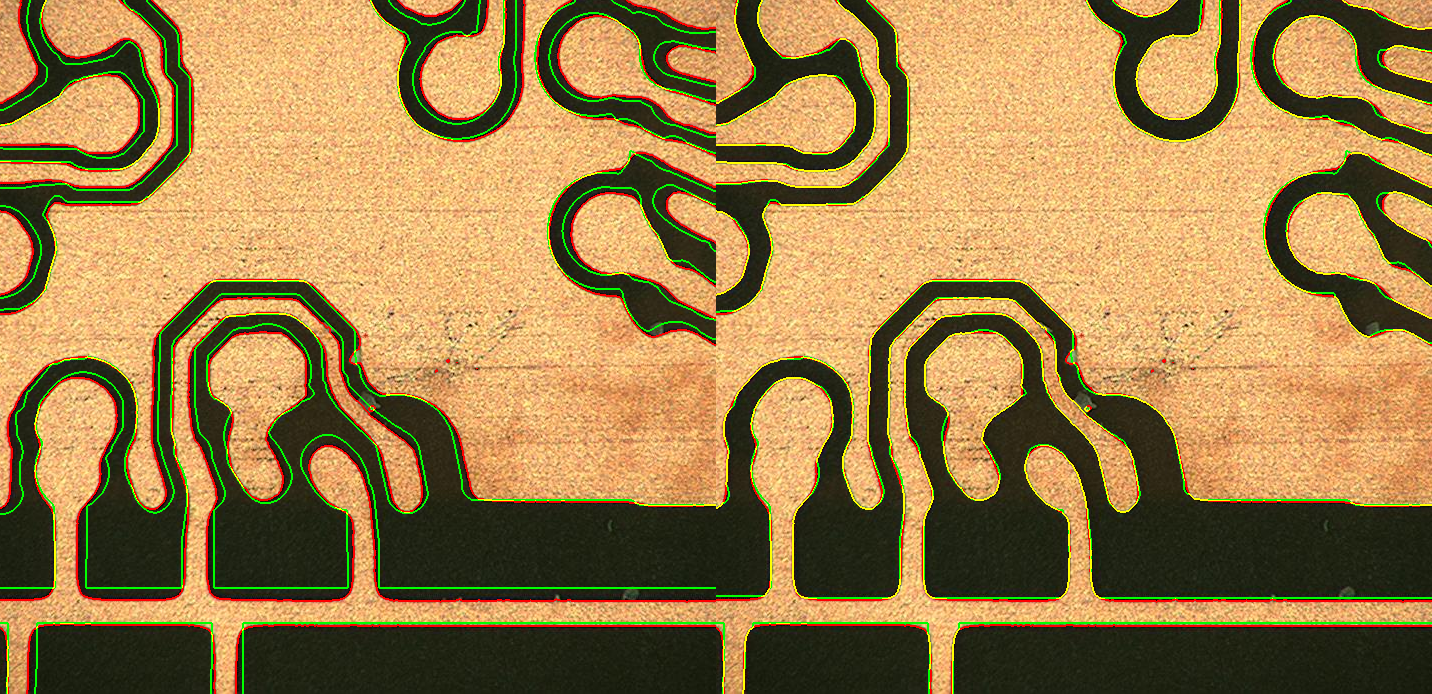

In [4]:
vrs_ = threshold_real(vrs, color="BGR", blurring="gauss", ksize=7)
cam_ = threshold_real(cam, color="BGR", blurring="gauss", ksize=7)
bbox1, bbox2, score = aligned_pairs(vrs_, cam_, mode="center", factor=0.6)
print(bbox1, bbox2, score)

sub_vrs = crop_image(vrs, bbox1)
sub_vrs_ = crop_image(vrs_, bbox1)
sub_cam = crop_image(cam, bbox2)
sub_cam_ = crop_image(cam_, bbox2)

a = label_regions(sub_vrs.copy(), [sub_vrs_, sub_cam_], [(0, 0, 255), (0, 255, 0)])

sub_cam_plus = revise_templ(sub_cam_, sub_vrs_, 2, 5, small_area=100)

b = label_regions(sub_vrs.copy(), [sub_vrs_, sub_cam_plus], [(0, 0, 255), (0, 255, 0)])

show_images((a, b), color="BGR")

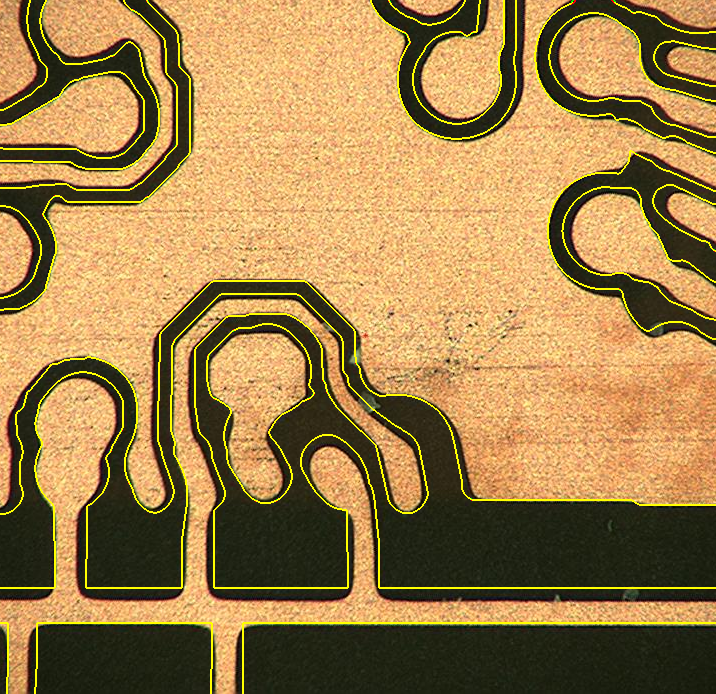

In [5]:
kernel = disk(radius=3)
sub_cam_opening = binary_opening(sub_cam_, kernel)

c = label_regions(sub_vrs.copy(), [sub_cam_, sub_cam_opening], [(0, 0, 255), (0, 255, 0)])

show_image(c, color="BGR")